In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex] #preguntar

In [ ]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic["class"] = titanic.pclass.map({1:"First", 2:"Second", 3:"Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis = 1) #axis=1: significa: que se aplica a lo largo del eje 1 (es decir, a lo largo de las filas) #preguntar
titanic["adult_male"] = titanic.who == "man" #who devuelve un booleano
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s) #extrae la primera letra
titanic["embark_town"] = titanic.embarked.map({"C":"Cherbourg", "Q":"Queenstown", "S":"Southampton"})
titanic["alive"] = titanic.survived.map({0:"no", 1:"yes"})
titanic["alone"] = (titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1) #alimina columnas

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,False


In [ ]:
#agrega paleta de colores
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

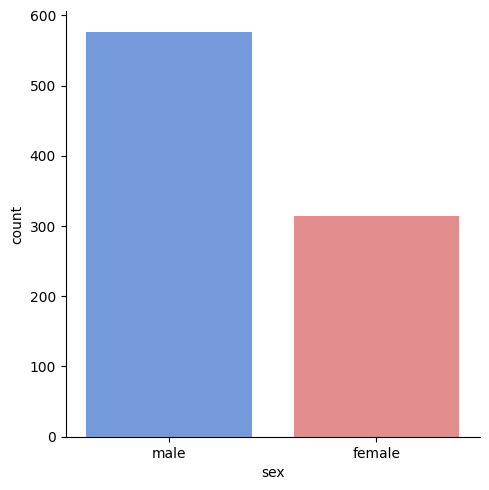

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'titanic' es tu DataFrame
sns.catplot(kind="count", x="sex", hue="sex", data=titanic, palette=pal) #preguntar
plt.show()

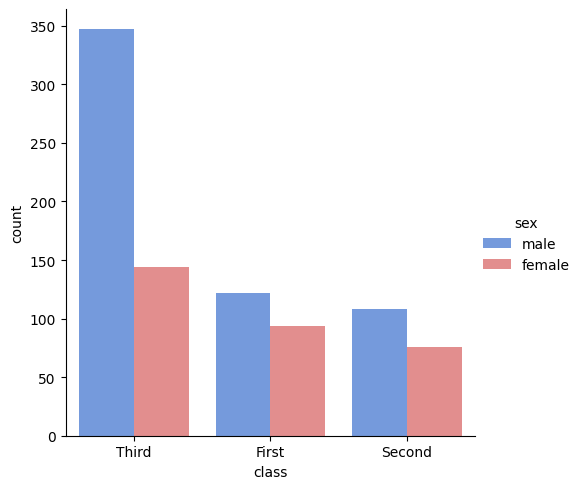

In [ ]:
sns.catplot(kind="count", x="class", hue="sex", data=titanic, palette=pal)
plt.show()

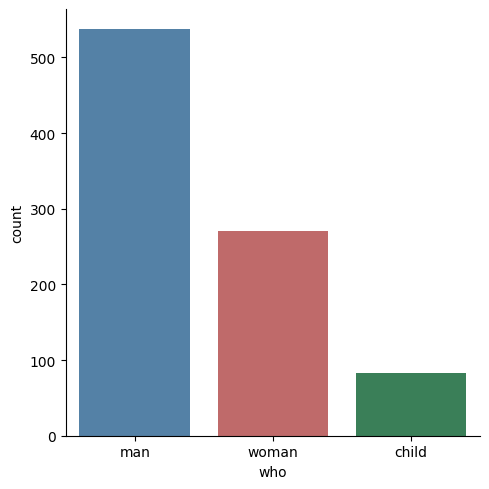

In [ ]:
sns.catplot(kind="count", x="who", hue="who", data=titanic, palette=pal) #importante para el recuento el kind="count"

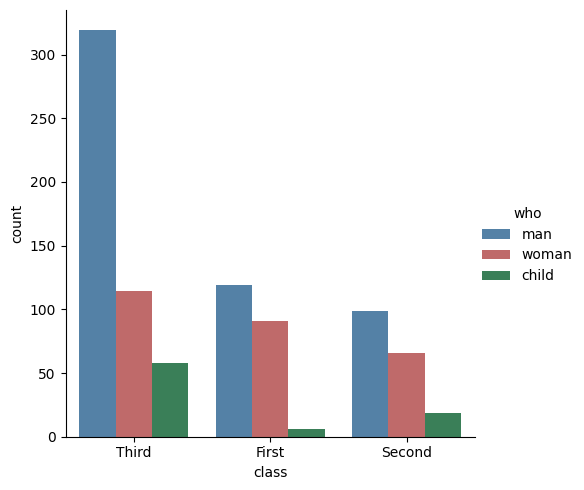

In [ ]:
sns.catplot(kind="count", x="class", data=titanic, hue="who", palette=pal) #preguntar por hue

<ipython-input-64-abc2818e98c7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="count", x="adult_male", data=titanic, palette="Blues")


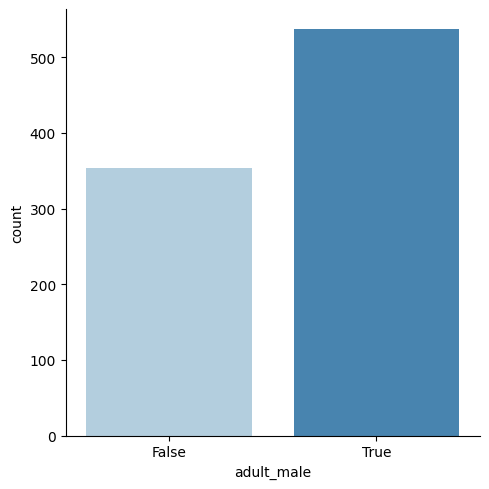

In [ ]:
sns.catplot(kind="count", x="adult_male", data=titanic, palette="Blues")

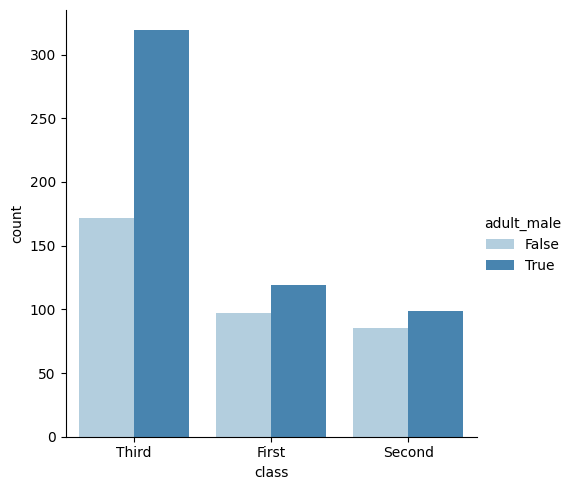

In [ ]:
sns.catplot(kind="count", x="class", data=titanic, hue="adult_male", palette="Blues")

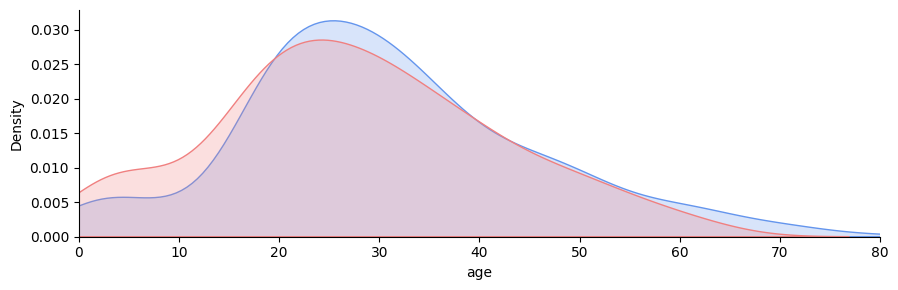

In [ ]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0,80))
plt.show()

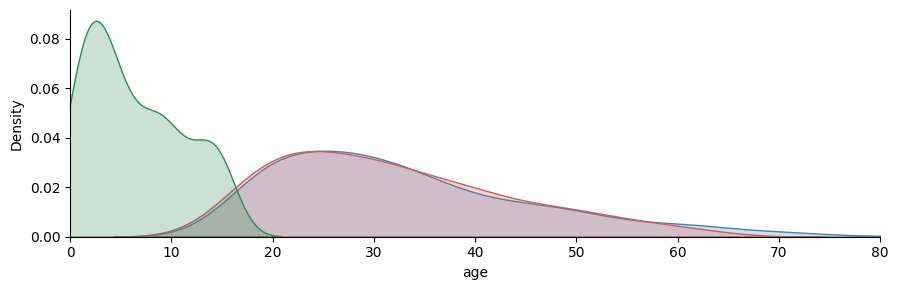

In [ ]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0,80))
plt.show()


<ipython-input-81-2760537da049>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="count", x="class", data=titanic, palette="BuPu_d")


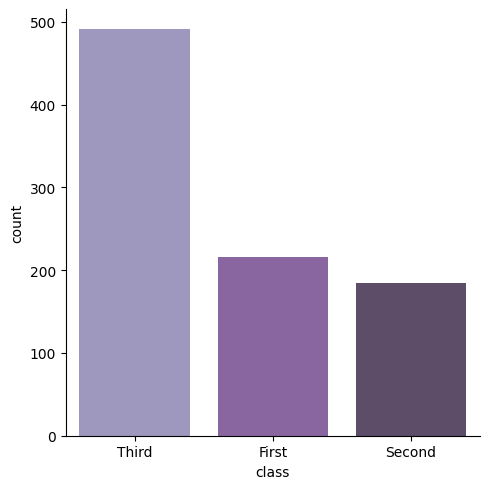

In [ ]:
sns.catplot(kind="count", x="class", data=titanic, palette="BuPu_d")
plt.show()

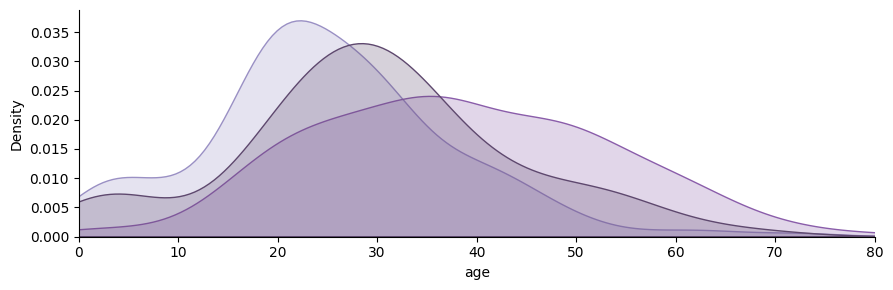

In [ ]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0,80))

Habían más personas de la 3ra clase

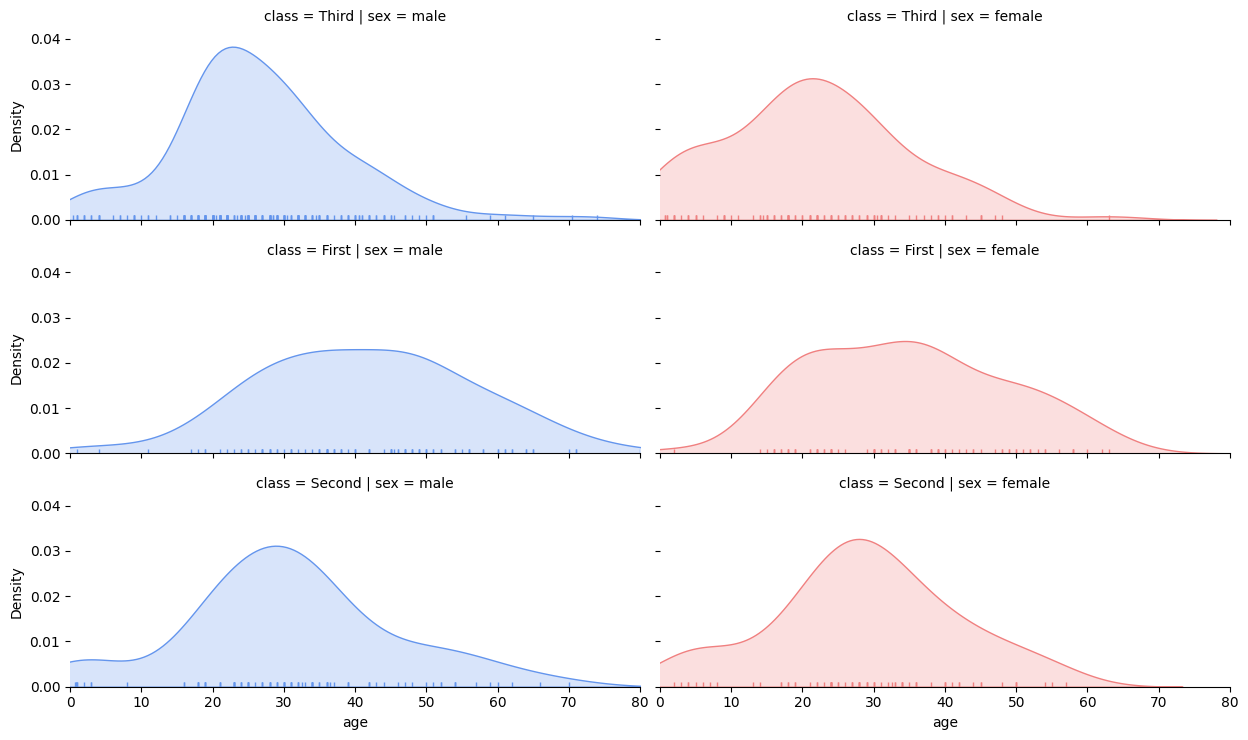

In [ ]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", height=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0,80))

En esta gráfica se observa la cantidad de hombres o mujeres, su edad, y su clase social, tanto hombres como mujeres eran jovenes entre los 20 y 30 años. La clase 3 tenia la mayor cantidad de personas jovenes

<ipython-input-106-68d4b60f5375>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="count", x="deck", data=titanic, palette="PuBu_d", legend=False)


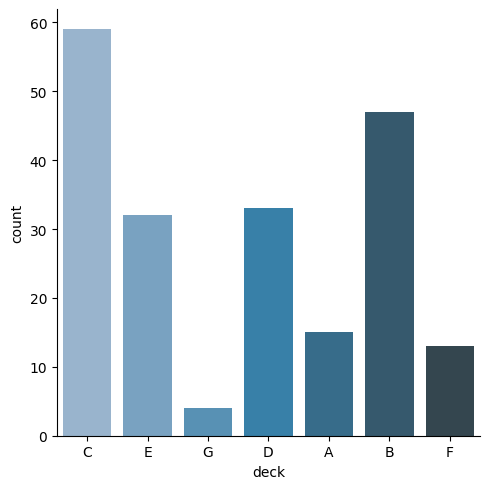

In [ ]:
sns.catplot(kind="count", x="deck", data=titanic, palette="PuBu_d", legend=False)
plt.show()

En C subió la mayor cantidada de pasajeros

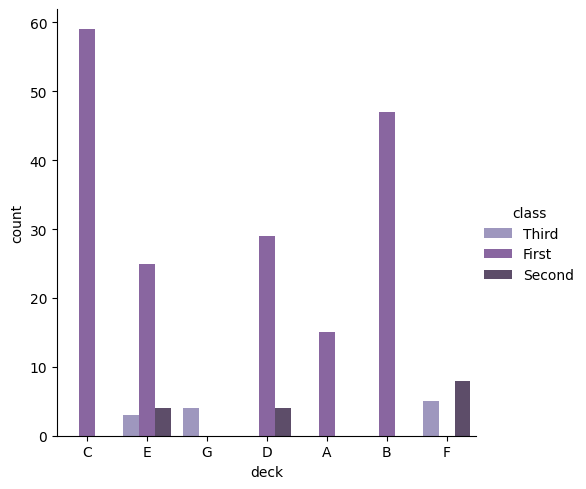

In [ ]:
sns.catplot(kind="count", x="deck", hue="class", data=titanic, palette="BuPu_d")

En F y g, no subió primera clase